## Observations and Insights 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mergeData_df=pd.merge(mouse_metadata, study_results, on="Mouse ID", how = "left")
# Display the data table for preview
mergeData_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [7]:
# Checking the number of unique mice.
mergeData_df["Mouse ID"].nunique()

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#find_duplicate =mergeData_df.loc[mergeData_df.duplicated(subset=['Mouse ID', 'Timepoint']),['Mouse ID','Timepoint']]
find_duplicate = mergeData_df.loc[mergeData_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
find_duplicate

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
iso_dup_mouseId = mergeData_df.loc[mergeData_df["Mouse ID"] == "g989"]
iso_dup_mouseId

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanmouse_df = mergeData_df[mergeData_df["Mouse ID"].isin(find_duplicate) == False]
cleanmouse_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [11]:
# Checking the number of mice in the clean DataFrame.
cleanmouse_df["Mouse ID"].nunique()

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
meandata = cleanmouse_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
mediandata = cleanmouse_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
vardata = cleanmouse_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
stddata= cleanmouse_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
semdata= cleanmouse_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
# This method is the most straighforward, creating multiple series and putting them all together at the end.
TumVolSum_df = pd.DataFrame({"Tumor Volume Mean": meandata,
                           "Tumor Volume Median": mediandata,
                           "Tumor Volume Variance": vardata,
                           "Tumor Volume STDEV": stddata,
                           "Tumor Volume SEM": semdata })
TumVolSum_df

Tumor Volume Mean  Tumor Volume Median  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume STDEV  Tumor Volume SEM  
Drug Regimen                                        
Capomulin               4.994774          0.329346  
Ceftamin                6.268188          0.469821  
Infubinol               6.567243          0.492236  
Ketapril                8.279709          0.603860  
Naftisol                8.134708          0.596466  
Placebo                 7.821003          0.581331  
Propriva                6.622085          0.544332  
Ramicane                4.846308          0.320955  
Stelasyn                7.710419          0.573111  
Zoniferol               6.966589          0.516398

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
summary1_df = cleanmouse_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary1_df



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
miceOndrugs = cleanmouse_df.groupby("Drug Regimen")
# Create a dataframe counting the number of data points for each Drug Regimen
drugscount_df = pd.DataFrame(miceOndrugs["Mouse ID"].count())
drugscount_df = drugscount_df.rename(columns ={"Mouse ID": "Mice"})
drugscount_df = drugscount_df.sort_values("Mice",ascending=False)
drugscount_df

Mice
Drug Regimen      
Capomulin      230
Ramicane       228
Ketapril       188
Naftisol       186
Zoniferol      182
Placebo        181
Stelasyn       181
Ceftamin       178
Infubinol      178
Propriva       148

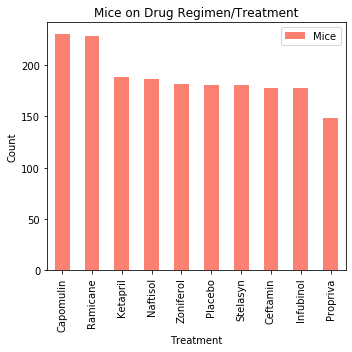

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drugsbarplot = drugscount_df.plot(kind='bar', title = "Mice on Drug Regimen/Treatment", color="salmon", figsize=(5,5))
#Set xlabel/ylabel
drugsbarplot.set_xlabel("Treatment")
drugsbarplot.set_ylabel("Count")
#Layout
plt.tight_layout()
plt.savefig("../barChart.png")
plt.show()


In [16]:
forpyplot = drugscount_df.reset_index("Drug Regimen")
forpyplot

Drug Regimen  Mice
0    Capomulin   230
1     Ramicane   228
2     Ketapril   188
3     Naftisol   186
4    Zoniferol   182
5      Placebo   181
6     Stelasyn   181
7     Ceftamin   178
8    Infubinol   178
9     Propriva   148

Text(0, 0.5, 'Mice Count')

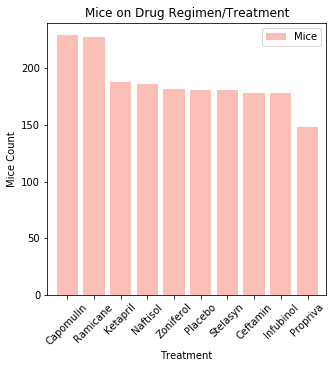

In [17]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#Create a handle/variable because passing dataframe columnn wasnt working like in avg_state_rain activity
mice_counts = forpyplot["Mice"]

#Set the x_axis and tick locations 
x_axis = np.arange(len(forpyplot))
tick_locations = [value for value in x_axis]


#Set size of bar chart and xticks and color see example from avg_state_rain activity
plt.figure(figsize=(5,5))
plt.bar(x_axis, mice_counts, alpha=0.5, align="center", color='salmon')
plt.xticks(tick_locations, forpyplot["Drug Regimen"], rotation=45)

#Set xlim/ylim
plt.xlim(-0.75, len(x_axis)-0.30)
plt.ylim(0, max(mice_counts)+10)

#Legend
plt.legend(["Mice"])

#Set title, xlabel and ylabel
plt.title("Mice on Drug Regimen/Treatment")
plt.xlabel("Treatment")
plt.ylabel("Mice Count")



In [18]:
# Group genders to show the distribution of female versus male mice using pandas
Fem_Male_groupby = cleanmouse_df.groupby("Sex")
Fem_vs_Male_df =pd.DataFrame(Fem_Male_groupby["Sex"].count())
#Show dataframe in a different way just to check totals
Fem_vs_Male = Fem_vs_Male_df.rename(columns= {"Sex":"Total"})
Fem_vs_Male 

Total
Sex          
Female    922
Male      958

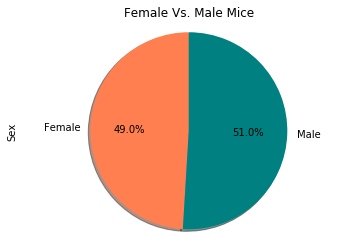

In [19]:
# Group genders to show the distribution of female versus male mice using pandas
#PieChart=cleanmouse_df.groupby(['Sex']).sum().plot(kind='pie', y='Sex', shadow = True)
fMchart = Fem_vs_Male_df.plot(kind='pie', y="Sex", title="Female Vs. Male Mice", autopct='%1.1f%%',shadow=True, startangle=90, colors =["coral","teal"],legend =False)
plt.axis("equal")
plt.savefig("../PandasPie.png")
plt.show()



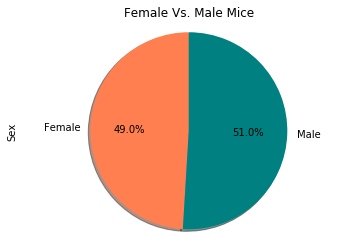

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = list(Fem_vs_Male_df.index.values)
Sex = Fem_vs_Male_df['Sex']
colors = ["coral", "teal"]

plt.pie(Sex, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Female Vs. Male Mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [21]:
cleanmouse_df

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1880 rows x 8 columns]

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = cleanmouse_df.groupby(["Mouse ID"]).max()
max_timepoint = max_timepoint.reset_index() 
max_timepoint

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0       a203    Infubinol  Female          20          23         45   
1       a251    Infubinol  Female          21          25         45   
2       a262      Placebo  Female          17          29         45   
3       a275     Ceftamin  Female          20          28         45   
4       a366     Stelasyn  Female          16          29         30   
..       ...          ...     ...         ...         ...        ...   
243     z435     Propriva  Female          12          26         10   
244     z578     Ramicane    Male          11          16         45   
245     z581    Infubinol  Female          24          25         45   
246     z795     Naftisol  Female          13          29         45   
247     z969     Naftisol    Male           9          30         45   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
2             70.717621                 4  
3             62.999356                 3  
4             63.440686                 1  
..                  ...               ...  
243           48.710661                 0  
244           45.000000                 0  
245           62.754451                 3  
246           65.741070                 3  
247           73.867845                 4  

[248 rows x 8 columns]

In [23]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_maxTP_df = max_timepoint[["Mouse ID","Timepoint"]].merge(cleanmouse_df, on=["Mouse ID","Timepoint"], how ='left' )
combined_maxTP_df

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
2       a262         45      Placebo  Female          17          29   
3       a275         45     Ceftamin  Female          20          28   
4       a366         30     Stelasyn  Female          16          29   
..       ...        ...          ...     ...         ...         ...   
243     z435         10     Propriva  Female          12          26   
244     z578         45     Ramicane    Male          11          16   
245     z581         45    Infubinol  Female          24          25   
246     z795         45     Naftisol  Female          13          29   
247     z969         45     Naftisol    Male           9          30   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
2             70.717621                 4  
3             62.999356                 3  
4             63.440686                 1  
..                  ...               ...  
243           48.710661                 0  
244           30.638696                 0  
245           62.754451                 3  
246           65.741070                 3  
247           73.867845                 4  

[248 rows x 8 columns]

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin
Drug1 = combined_maxTP_df.loc[combined_maxTP_df["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
Drug2 = combined_maxTP_df.loc[combined_maxTP_df["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]
Drug3 = combined_maxTP_df.loc[combined_maxTP_df["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]
Drug4 = combined_maxTP_df.loc[combined_maxTP_df["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]



In [25]:
# Put treatments into a list for for loop (and later for plot labels)
List1 = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_list =[]

for x in List1:
#Locate the rows which contain mice on each drug and get the tumor volumes
    drugData = combined_maxTP_df.loc[combined_maxTP_df["Drug Regimen"]== x]["Tumor Volume (mm3)"]
    tumor_list.append(drugData)
    
    quartiles = drugData.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
# Determine outliers using upper and lower bounds    
    print(f"{x} potential outliers: {drugData.loc[(drugData < lower_bound) | (drugData > upper_bound)]}")

    
    
  
    

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


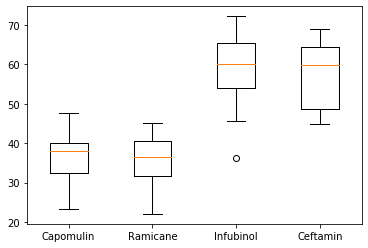

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_list, labels = List1)
plt.savefig("../Boxplot.png")

## Line and Scatter Plots

In [27]:
mouse_C_drug = pd.DataFrame(combined_maxTP_df.loc[combined_maxTP_df["Drug Regimen"]=="Capomulin",:])
mouse_C_drug

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
19      b128         45    Capomulin  Female           9          22   
24      b742         45    Capomulin    Male           7          21   
61      f966         20    Capomulin    Male          16          17   
64      g288         45    Capomulin    Male           3          19   
66      g316         45    Capomulin  Female          22          22   
80      i557         45    Capomulin  Female           1          24   
83      i738         45    Capomulin  Female          23          20   
85      j119         45    Capomulin  Female           7          23   
87      j246         35    Capomulin  Female          21          21   
108     l509         45    Capomulin    Male          17          21   
115     l897         45    Capomulin    Male          17          19   
121     m601         45    Capomulin    Male          22          17   
124     m957         45    Capomulin  Female           3          19   
162     r157         15    Capomulin    Male          22          25   
163     r554         45    Capomulin  Female           8          17   
169     r944         45    Capomulin    Male          12          25   
174     s185         45    Capomulin  Female           3          17   
180     s710         45    Capomulin  Female           1          23   
183     t565         45    Capomulin  Female          20          17   
192     u364         45    Capomulin    Male          18          17   
204     v923         45    Capomulin  Female          19          21   
208     w150         10    Capomulin    Male          23          23   
220     w914         45    Capomulin    Male          24          21   
226     x401         45    Capomulin  Female          16          15   
239     y793         45    Capomulin    Male          17          17   

     Tumor Volume (mm3)  Metastatic Sites  
19            38.982878                 2  
24            38.939633                 0  
61            30.485985                 0  
64            37.074024                 1  
66            40.159220                 2  
80            47.685963                 1  
83            37.311846                 2  
85            38.125164                 1  
87            38.753265                 1  
108           41.483008                 3  
115           38.846876                 1  
121           28.430964                 1  
124           33.329098                 1  
162           46.539206                 0  
163           32.377357                 3  
169           41.581521                 2  
174           23.343598                 1  
180           40.728578                 1  
183           34.455298                 0  
192           31.023923                 3  
204           40.658124                 2  
208           39.952347                 0  
220           36.041047                 2  
226           28.484033                 0  
239           31.896238                 2

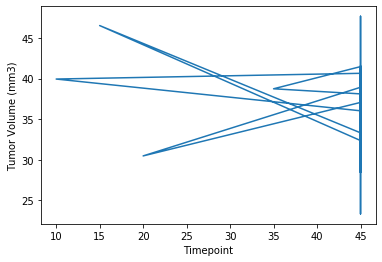

In [132]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_find = pd.DataFrame(combined_maxTP_df.loc[combined_maxTP_df["Mouse ID"]=="l509",:])
#mouse_find2 = mouse_find[["Timepoint","Tumor Volume (mm3)"]]
Timepoint = mouse_C_drug["Timepoint"]
Tumor_volume = mouse_C_drug["Tumor Volume (mm3)"]

Tumor_Vol, = plt.plot(Timepoint, Tumor_volume)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

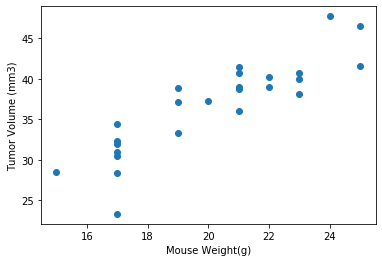

In [129]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouseweight = mouse_C_drug.groupby(mouse_C_drug["Mouse ID"])["Weight (g)"].mean()
tumorvolume = mouse_C_drug.groupby(mouse_C_drug["Mouse ID"])["Tumor Volume (mm3)"].mean()
plt.scatter(mouseweight,tumorvolume)
plt.xlabel("Mouse Weight(g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
